In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

import joblib

from sklearn.inspection import plot_partial_dependence
from sklearn.decomposition import PCA


In [2]:
def setup(split):
    # setting split and path
    path = "../kitt/DATA_progress3_new/"
    train_path = "{}/{}/train/train_oversampling.csv".format(path,split)
    test_path =  "{}/test.csv".format(path)
    valid_path = "{}/{}/val/val.csv".format(path,split)

    print(train_path)
    # Load the train set
    train_data = pd.read_csv(train_path)
    print(train_data.shape)
    x_train = train_data[train_data.columns[2:]]
    print(x_train.shape)
    y_train = train_data[train_data.columns[1]]
    le = LabelEncoder()
    y_train = np.array(le.fit_transform(y_train))
    print(le.classes_)
    print(test_path)
    # Load the test set
    test_data = pd.read_csv(test_path)
    print(test_data.shape)
    x_test = test_data[test_data.columns[2:]]
    print(x_test.shape)
    y_test = test_data[test_data.columns[1]]
    le = LabelEncoder()
    y_test = np.array(le.fit_transform(y_test))
    print(le.classes_)

    print(valid_path)
    # Load the validation set
    val_data = pd.read_csv(valid_path)
    print(val_data.shape)
    x_val = val_data[val_data.columns[2:]]
    print(x_val.shape)
    y_val = val_data[val_data.columns[1]]
    le = LabelEncoder()
    y_val = np.array(le.fit_transform(y_val))
    print(le.classes_)

    # StandardScaler
    sc = StandardScaler()
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    x_val = x_val.to_numpy()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    x_val = sc.transform(x_val)
    
    return x_train,y_train,x_test,y_test,x_val,y_val

In [15]:
# def kernal_svm(split):
#     # import some data to play with
#     x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
#     X = x_train[:, [0, 6]]  # we only take the first two features. We could
#                           # avoid this ugly slicing by using a two-dim dataset
#     y = y_train

#     h = .02  # step size in the mesh

#     # we create an instance of SVM and fit out data. We do not scale our
#     # data since we want to plot the support vectors
#     C = 1.0  # SVM regularization parameter
#     # svc = svm.SVC(kernel='linear', C=C).fit(X, y)
#     # rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
#     # poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
#     # lin_svc = svm.LinearSVC(C=C).fit(X, y)

#     # rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
#     rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#     rbf_svc.fit(X, y)

#     # create a mesh to plot in
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # title for the plots
#     titles = ['SVC with RBF kernel']

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].

#     Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(titles[0])
#     plt.show()

# def kernal_svm(split, param=2):
#     # import some data to play with
#     x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
#     X = x_train[:, :]  # we only take the first two features. We could
#                           # avoid this ugly slicing by using a two-dim dataset
#     y = y_train

#     h = .02  # step size in the mesh

#     # load the pre-trained SVM model
#     loaded_model = joblib.load('model/param{}/SVM_model_{}.pkl'.format(param,split))

#     # create a mesh to plot in
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # title for the plots
#     titles = ['SVC with RBF kernel']

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].

#     Z = loaded_model.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(titles[0])
#     plt.show()

# def plot_decision_boundary(model, X, y):
#     # perform PCA dimensionality reduction
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)

#     # create a mesh to plot in
#     h = .02  # step size in the mesh
#     x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
#     y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # make predictions on the mesh
#     Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#     # Plot also the training points
#     plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm)
#     plt.xlabel('PC1')
#     plt.ylabel('PC2')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title('SVC with RBF kernel')
#     plt.show()

# def plot_decision_boundary(model, X, y, cmap='coolwarm', alpha=0.8):
#     """
#     Plot the decision boundary of a binary classification model.

#     Parameters
#     ----------
#     model : binary classification model
#         The model to plot the decision boundary for.
#     X : array-like, shape (n_samples, n_features)
#         The input data.
#     y : array-like, shape (n_samples,)
#         The target values.
#     cmap : str or colormap, optional (default='coolwarm')
#         The colormap to use for the plot.
#     alpha : float, optional (default=0.8)
#         The alpha value for the plot.

#     Returns
#     -------
#     None
#     """
#     # perform PCA dimensionality reduction
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)

#     # create a mesh to plot in
#     h = .02  # step size in the mesh
#     x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
#     y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # make predictions on the mesh
#     Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=cmap, alpha=alpha)

#     # Plot the training points
#     scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, alpha=alpha)

#     # Add a legend
#     plt.legend(*scatter.legend_elements())

#     plt.xlabel('PC1')
#     plt.ylabel('PC2')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(f'{type(model).__name__} decision boundary')
#     plt.show()
# def do_plot(model, X, y):    
#     # Plot decision boundary
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
#     ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()

#     # Create grid to evaluate model
#     xx = np.linspace(xlim[0], xlim[1], 30)
#     yy = np.linspace(ylim[0], ylim[1], 30)
#     YY, XX = np.meshgrid(yy, xx)
#     xy = np.vstack([XX.ravel(), YY.ravel()]).T
#     Z = model.decision_function(xy).reshape(XX.shape)

#     # Plot decision boundary and margins
#     ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#     ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#     plt.show()

# def do_plot(model, X, y): 
# # Plot decision boundary
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
#     ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()

#     # Create grid to evaluate model
#     xx = np.linspace(xlim[0], xlim[1], 30)
#     yy = np.linspace(ylim[0], ylim[1], 30)
#     YY, XX = np.meshgrid(yy, xx)
#     xy = np.vstack([XX.ravel(), YY.ravel()]).T
#     pc1, pc2 = xy[:, 0], xy[:, 1]
#     Z = model.predict(np.column_stack((pc1, pc2))).reshape(XX.shape)

#     # Plot decision boundary and margins
#     ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#     ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#     plt.show()
    
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

In [23]:
# def plot_decision_boundary(model, X, y, cmap='coolwarm', alpha=0.8):
#     """
#     Plot the decision boundary of a binary classification model.

#     Parameters
#     ----------
#     model : binary classification model
#         The model to plot the decision boundary for.
#     X : array-like, shape (n_samples, n_features)
#         The input data.
#     y : array-like, shape (n_samples,)
#         The target values.
#     cmap : str or colormap, optional (default='coolwarm')
#         The colormap to use for the plot.
#     alpha : float, optional (default=0.8)
#         The alpha value for the plot.

#     Returns
#     -------
#     None
#     """
#     # perform PCA dimensionality reduction
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)

#     # create a mesh to plot in
#     h = .02  # step size in the mesh
#     x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
#     y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # make predictions on the mesh
#     Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=cmap, alpha=alpha)

#     # Plot the training points
#     scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, alpha=alpha)

#     # Add a legend
#     plt.legend(*scatter.legend_elements())

#     # Add hyperplane
#     w = model.coef_[0]
#     a = -w[0] / w[1]
#     xx_hyper = np.linspace(x_min, x_max)
#     yy_hyper = a * xx_hyper - (model.intercept_[0]) / w[1]
#     plt.plot(xx_hyper, yy_hyper, 'k-', label='hyperplane')

#     plt.xlabel('PC1')
#     plt.ylabel('PC2')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(f'{type(model).__name__} decision boundary')
#     plt.show()

# model = SVC(C=100, gamma=0.001, kernel='rbf',probability=True)

In [21]:
def plot_decision_boundary(model, X, y, cmap='coolwarm', alpha=0.8):
    """
    Plot the decision boundary of a binary classification model.

    Parameters
    ----------
    model : binary classification model
        The model to plot the decision boundary for.
    X : array-like, shape (n_samples, n_features)
        The input data.
    y : array-like, shape (n_samples,)
        The target values.
    cmap : str or colormap, optional (default='coolwarm')
        The colormap to use for the plot.
    alpha : float, optional (default=0.8)
        The alpha value for the plot.

    Returns
    -------
    None
    """
    # perform PCA dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # make predictions on the mesh
    if hasattr(model, 'decision_function'):
        Z = model.decision_function(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=alpha)

    # Plot the training points
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, alpha=alpha)

    # Add a legend
    plt.legend(*scatter.legend_elements())

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f'{type(model).__name__} decision boundary')

    # Add hyperplane for linear SVMs
    if hasattr(model, 'coef_'):
        w = model.coef_[0]
        a = -w[0] / w[1]
        xx_hyper = np.linspace(x_min, x_max)
        yy_hyper = a * xx_hyper - (model.intercept_[0]) / w[1]
        plt.plot(xx_hyper, yy_hyper, 'k--')

    plt.show()

C:\Users\supak\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


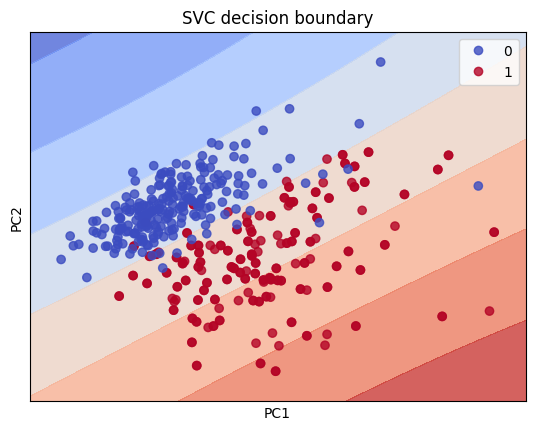

In [22]:
# kernal_svm("split1")
split = "split1"
model = joblib.load('model/param2/SVM_model_{}.pkl'.format(split))
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
X = x_train[:, :]
y = y_train
plot_decision_boundary(model, X, y)
# do_plot(model, x_train, y_train)

C:\Users\supak\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


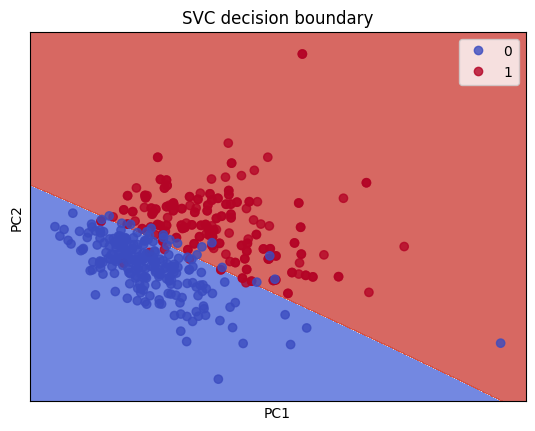

In [6]:
# kernal_svm("split2")
split = "split2"
model = joblib.load('model/param2/SVM_model_{}.pkl'.format(split))
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
X = x_train[:, :]
y = y_train
plot_decision_boundary(model, X, y)

C:\Users\supak\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


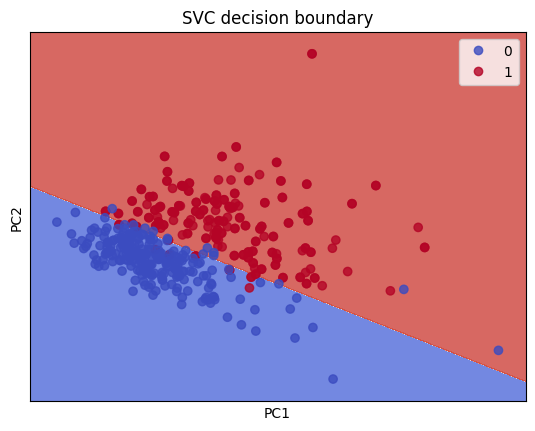

In [7]:
# kernal_svm("split3")
split = "split3"
model = joblib.load('model/param2/SVM_model_{}.pkl'.format(split))
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
X = x_train[:, :]
y = y_train
plot_decision_boundary(model, X, y)

C:\Users\supak\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


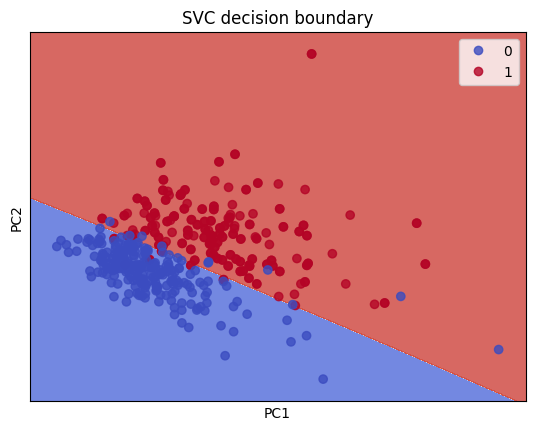

In [8]:
split = "split4"
model = joblib.load('model/param2/SVM_model_{}.pkl'.format(split))
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
X = x_train[:, :]
y = y_train
plot_decision_boundary(model, X, y)

C:\Users\supak\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


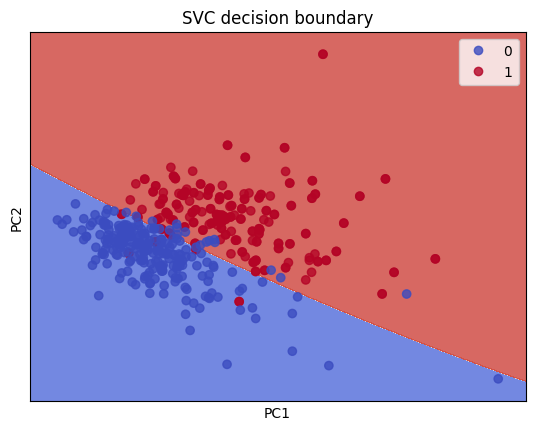

In [9]:
split = "split5"
model = joblib.load('model/param2/SVM_model_{}.pkl'.format(split))
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
X = x_train[:, :]
y = y_train
plot_decision_boundary(model, X, y)